In [19]:
# TO DO,
# get rid of max null columns,
# Map categorical to dummy df / one hot encoder / labelencode,
# Map binary categorical data to 0 and 1,
# Mapping letter \"l\" and \"o\" to numbers 1 and 0,

# Deal with weird space character s53 (delete or encode)
# Correlation between two columns

# https://www.analyticsvidhya.com/blog/2015/11/8-ways-deal-continuous-variables-predictive-modeling/
# https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/

In [2]:
#pip freeze > requirements.txt

In [4]:
#pip install statsmodels

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing, svm
from sklearn.preprocessing import OneHotEncoder

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score
#import statmodels.api as sm  # For statistical analysis

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28322 entries, 0 to 28321
Data columns (total 36 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      28322 non-null  object 
 1   gender  28322 non-null  object 
 2   s11     28322 non-null  object 
 3   s12     28322 non-null  object 
 4   s13     28322 non-null  int64  
 5   s16     28322 non-null  object 
 6   s17     28322 non-null  object 
 7   s18     28322 non-null  object 
 8   s48     28322 non-null  int64  
 9   s52     28322 non-null  object 
 10  s53     28322 non-null  object 
 11  s54     2628 non-null   object 
 12  s55     3206 non-null   object 
 13  s56     0 non-null      float64
 14  s57     0 non-null      float64
 15  s58     28322 non-null  object 
 16  s59     0 non-null      float64
 17  s69     28322 non-null  object 
 18  s70     28322 non-null  object 
 19  s71     28322 non-null  object 
 20  n1      28322 non-null  float64
 21  n2      28322 non-null  float64
 22

In [62]:
# Viewing the values and getting an idea of the data
x = df.columns

for i in x:
    print(df[i].value_counts())
    print("\n************\n")

b'gAAAAABinOicS09vrmgh0_JyEHihI13ptO0rCyHP7l76be71PWA2ReUc4HUQn16Fya1z8_VStNnFGaXJF262CgsuMPzOaknSeg=='    1
b'gAAAAABinOiekMHaC6-03yzvmLFVBfqljUIev5XFrbbJarEbo-mshNj5pWAXfTdmvEMQtb0WjtlboHt2rFBrCoipjAn9sOOZEg=='    1
b'gAAAAABinOiYtx-HpOZBYTtT-FndzIj6Nt2HTKu7UKAs-Dfxd8mxrvwxRNGE47Si_-kc5TiwVkTf59u94658aAU7gHD9-TGBMQ=='    1
b'gAAAAABinOia961WRLsDIRdEcGr5_RSKfmTjQ2ME5HBpIUtBdjJUeCTgVI6uzDIdnDRB58VBUvirHgdTdjgECltfpZ2XequVmA=='    1
b'gAAAAABinOibb7LcG8T4rQSnzf-b2GjK5D0F1ZLe6VMES-x90Pi5-Emk_dbp7xYXuepQpmVa_rhfEsemOUZUGn9_30mt-Vr8iQ=='    1
                                                                                                          ..
b'gAAAAABinOiawRN0qVxqLZn-_t1Qb87hktzzZnsBU00aUINCq1S48jnwhwxdn5XNd6mR189SFIILrWFbz0_LyBAvIlgUCImvqw=='    1
b'gAAAAABinOiZPy87pVtsRScbROxYGDhSan3Pp9q53S8zvzjZWJIhBd_PGqGRWUhxCwbTpmkda93liZMesGSchyhojqcCkJUD2w=='    1
b'gAAAAABinOib5XtfV1CgG7sJ3lqWVyVEX63543B09-SgMzYFlBkQuLmoEYkpfdNT1_v2JR0feyWOaSlNB_HLd2WSNncMF_Pu8Q=='    1
b'gAAAAABinOiZOg76i

- Discrete Values: s13, s48, n3, n12, n13, n15
- LabelEncode:  ~~Gender, s11, s12, s16, s17, s18, s58, s69, s70, s71~~
- Mapping: s52
- ? : s53
- Drop: ~~s59, s57, s56, s55, s54~~
- Continuous vals: n1, n2, n4, n5, n6, n7, n8, n9, n10, n11, n14

In [3]:
df.isnull().sum()

id            0
gender        0
s11           0
s12           0
s13           0
s16           0
s17           0
s18           0
s48           0
s52           0
s53           0
s54       25694
s55       25116
s56       28322
s57       28322
s58           0
s59       28322
s69           0
s70           0
s71           0
n1            0
n2            0
n3            0
n4            0
n5            0
n6            0
n7            0
n8            0
n9            0
n10           0
n11           0
n12           0
n13           0
n14           0
n15           0
label         0
dtype: int64

In [4]:
df[['s59','s57','s56','s55','s54']] #Null columns

,s59,s57,s56,s55,s54
0,NaN,NaN,NaN,kK,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
28317,NaN,NaN,NaN,NaN,NaN
28318,NaN,NaN,NaN,2K,NaN
28319,NaN,NaN,NaN,NaN,NaN
28320,NaN,NaN,NaN,NaN,NaN


In [5]:
df.drop(['s59','s57','s56','s55','s54'], axis = 1, inplace= True)

In [56]:
df.columns

Index(['id', 'gender', 's11', 's12', 's13', 's16', 's17', 's18', 's48', 's52',
       's53', 's58', 's69', 's70', 's71', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6',
       'n7', 'n8', 'n9', 'n10', 'n11', 'n12', 'n13', 'n14', 'n15', 'label'],
      dtype='object')

In [6]:
# Use Label encoding for binary categorical data (Only two options eg: M/F, Y/N)
# Using scikit.learn library

label_encoder = preprocessing.LabelEncoder()

label_encode = ['gender','s11','s12','s53','s58']

for column in label_encode:
    df[column]= label_encoder.fit_transform(df[column])  
    df[column].unique()
    df[column].value_counts()

In [7]:
one_hot_encode = ['s16','s17','s18','s69','s70','s71']
ohe_df = pd.get_dummies(df[one_hot_encode])

# Drop column each of the original columns in the original database 
# as they are now encoded
df = df.drop(columns=one_hot_encode, axis = 1)

# Join the encoded df
df = df.join(ohe_df)


In [8]:
#Moving Target column 'label' to the right
df=df[[c for c in df if c not in ['label']] 
       + ['label']]

In [9]:
df.head()

,id,gender,s11,s12,s13,s48,s52,s53,s58,n1,...,s69_~1,s70_op: A,s70_op: B,s70_op: C,s70_op: D,s71_a,s71_b,s71_c,s71_d,label
0,b'gAAAAABinOicS09vrmgh0_JyEHihI13ptO0rCyHP7l76...,1,1,0,1,0,1,1,1,16.144666,...,0,0,0,0,1,0,1,0,0,0
1,b'gAAAAABinOiWGC1WhR6WYP0DA5ssGv9rIekrWUwCdJ8F...,1,1,1,1,1,1,1,1,7.144558,...,0,0,0,0,1,0,1,0,0,1
2,b'gAAAAABinOibTcOBFIVeA4nVF3FuFz_QX3ZlPPFc21gS...,1,1,1,1,0,1,1,1,6.923236,...,0,0,0,0,1,0,1,0,0,0
3,b'gAAAAABinOig-g3-Q1ggjlMhfUSdn21Aj5yVVeVvXbis...,0,1,1,1,0,1,1,1,5.749840,...,0,0,0,0,1,0,1,0,0,0
4,b'gAAAAABinOiXdoaNUzihOSbyY1tjWtd5EgMaXkkvH6SV...,1,0,1,1,1,l,1,1,14.771959,...,1,0,0,0,1,0,0,0,1,0


In [22]:
df.columns

Index(['id', 'gender', 's11', 's12', 's13', 's48', 's52', 's53', 's58', 'n1',
       'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12',
       'n13', 'n14', 'n15', 's16_A', 's16_B', 's16_C', 's16_D', 's17_A',
       's17_B', 's17_C', 's17_D', 's18_A', 's18_B', 's18_C', 's18_D', 's69_0',
       's69_C`', 's69_x', 's69_~1', 's70_op: A', 's70_op: B', 's70_op: C',
       's70_op: D', 's71_a', 's71_b', 's71_c', 's71_d', 'label'],
      dtype='object')

In [81]:
df_test = df[['s16_A', 's16_B', 's16_C', 's16_D']]
df_test_2 =df[['s17_A','s17_B', 's17_C', 's17_D']]
df_test_3 =df[['s18_A', 's18_B', 's18_C', 's18_D']]
df_test_4 =df[['s69_0','s69_C`', 's69_x', 's69_~1']]
df_test_5 =df[[ 's70_op: A', 's70_op: B', 's70_op: C','s70_op: D']]
df_test_6 =df[['s71_a', 's71_b', 's71_c', 's71_d']]



In [65]:
#Variance Inflation Factor function to check for multicollinearity
def variance(df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    
    # calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(df.values, i)
                            for i in range(len(df.columns))]
    print(vif_data)  


In [32]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

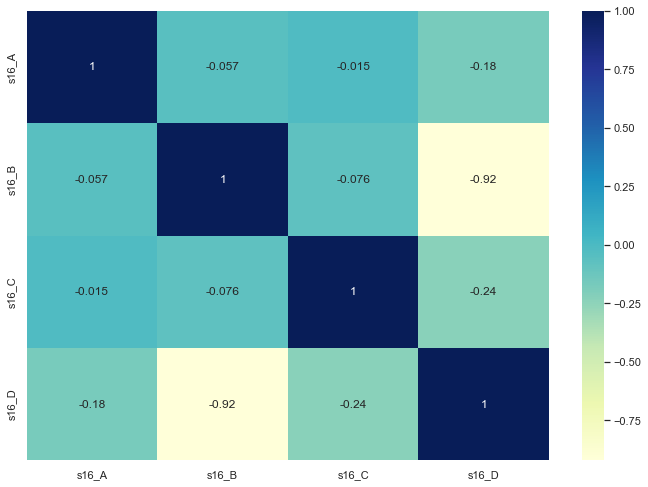

In [42]:
dataplot = sns.heatmap(df_test, cmap="YlGnBu", annot = True)
  
# displaying heatmap
plt.show()

In [89]:
# from scipy import stats
# df_test_2[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [10]:
df_desc= df[['n1','n2','n4','n5','n6','n7','n8','n9','n10','n11','n14']]

In [11]:
normalized_df=(df_desc-df_desc.mean())/df_desc.std()

In [12]:
df_2 = df[[ 'gender', 's11', 's12', 's13', 's48', 's52', 's53', 's58', 'n1',
       'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12',
       'n13', 'n14', 'n15', 's16_A', 's16_B', 's16_C', 's16_D', 's17_A',
       's17_B', 's17_C', 's17_D', 's18_A', 's18_B', 's18_C', 's18_D', 's69_0',
       's69_C`', 's69_x', 's69_~1', 's70_op: A', 's70_op: B', 's70_op: C',
       's70_op: D', 's71_a', 's71_b', 's71_c', 's71_d']]

In [13]:
df_2[['n1','n2','n4','n5','n6','n7','n8','n9','n10','n11','n14']] = normalized_df[['n1','n2','n4','n5','n6','n7','n8','n9','n10','n11','n14']]

c:\Users\Daraz\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [14]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28322 entries, 0 to 28321
Data columns (total 47 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   gender     28322 non-null  int32  
 1   s11        28322 non-null  int32  
 2   s12        28322 non-null  int32  
 3   s13        28322 non-null  int64  
 4   s48        28322 non-null  int64  
 5   s52        28322 non-null  object 
 6   s53        28322 non-null  int32  
 7   s58        28322 non-null  int32  
 8   n1         28322 non-null  float64
 9   n2         28322 non-null  float64
 10  n3         28322 non-null  int64  
 11  n4         28322 non-null  float64
 12  n5         28322 non-null  float64
 13  n6         28322 non-null  float64
 14  n7         28322 non-null  float64
 15  n8         28322 non-null  float64
 16  n9         28322 non-null  float64
 17  n10        28322 non-null  float64
 18  n11        28322 non-null  float64
 19  n12        28322 non-null  int64  
 20  n13   

In [15]:
replacement_mapping_dict = {
    "l": "1",
    "o": "0"
}
df_2[['s52']] = df_2[['s52']].apply(lambda x: x.replace(replacement_mapping_dict, regex=True))

c:\Users\Daraz\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [16]:
X= df_2
y= df['label']

In [17]:
clf = svm.SVC(kernel='linear', C=1).fit(X, y)

In [135]:
clf.score(X, y)

0.8690203000882613

In [136]:
scores = cross_val_score(clf, X, y, cv=5)

In [137]:
scores

array([0.8651368 , 0.87802295, 0.86935028, 0.8727048 , 0.86617232])